In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("WeatherDataSet1/combined_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,Date,tmax,tmin,prcp,City_Name
0,1,1892-01-01,32.0,-5.0,0.00,Lander
1,2,1892-01-02,38.0,2.0,0.00,Lander
2,3,1892-01-03,50.0,16.0,0.00,Lander
3,4,1892-01-04,46.0,32.0,0.00,Lander
4,5,1892-01-05,21.0,10.0,0.16,Lander


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6409958 entries, 0 to 6409957
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Date        object 
 2   tmax        float64
 3   tmin        float64
 4   prcp        float64
 5   City_Name   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 293.4+ MB


In [5]:
df.describe()

,Unnamed: 0,tmax,tmin,prcp
count,6.409958e+06,6.047890e+06,6.050635e+06,6.099249e+06
mean,2.536357e+04,6.281930e+01,4.174642e+01,8.896278e-02
std,1.479549e+04,2.138376e+01,1.963148e+01,2.789425e-01
min,1.000000e+00,-3.800000e+01,-5.900000e+01,0.000000e+00
25%,1.261900e+04,4.700000e+01,2.900000e+01,0.000000e+00
50%,2.523700e+04,6.600000e+01,4.300000e+01,0.000000e+00
75%,3.785500e+04,8.000000e+01,5.700000e+01,2.000000e-02
max,6.136100e+04,1.190000e+02,8.900000e+01,1.607000e+01


In [6]:
df = df.drop("Unnamed: 0", axis=1)
missing_values = df.isnull().sum()
print(missing_values)

Date              0
tmax         362068
tmin         359323
prcp         310709
City_Name         0
dtype: int64


In [7]:
df = df.dropna()

In [8]:
df['tmax'].fillna(df['tmax'].mean(), inplace = True)
df['tmin'].fillna(df['tmin'].mean(), inplace = True)
df['prcp'].fillna(0, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8604\20428562.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tmax'].fillna(df['tmax'].mean(), inplace = True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8604\20428562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.head()
df.tail()

,Date,tmax,tmin,prcp,City_Name
6409953,2023-12-27,51.1,44.1,0.09,Detroit
6409954,2023-12-28,45.0,39.9,0.28,Detroit
6409955,2023-12-29,41.0,37.9,0.06,Detroit
6409956,2023-12-30,39.9,30.2,0.00,Detroit
6409957,2023-12-31,39.0,34.0,0.02,Detroit


## Distribution of Maximum Temperatures for Top Cities in summer(June - August 2023)

In [12]:
#Distribution of Maximum Temperatures for Top Cities (June - August 2023)

summer_2023_data = df[(df['Date'].dt.year == 2023) & (df['Date'].dt.month.isin([6,7,8]))]

avg_tmax_summer = summer_2023_data.groupby('City_Name')['tmax'].mean().nlargest(10)

print(avg_tmax_summer)

City_Name
Austin             102.130435
ElPaso             101.410870
Roswell            101.169565
CollegeStation     101.038043
SanAntonio         100.208791
Abilene             99.573913
DallasFortWorth     99.447826
Houston             98.519565
CorpusChristi       98.155435
Hattiesburg         96.222826
Name: tmax, dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8604\2312486905.py:9: UserWarning: 
The markers list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=scatter_data, x='Date', y='tmax', hue='City_Name', style='City_Name', palette='deep', markers='o')


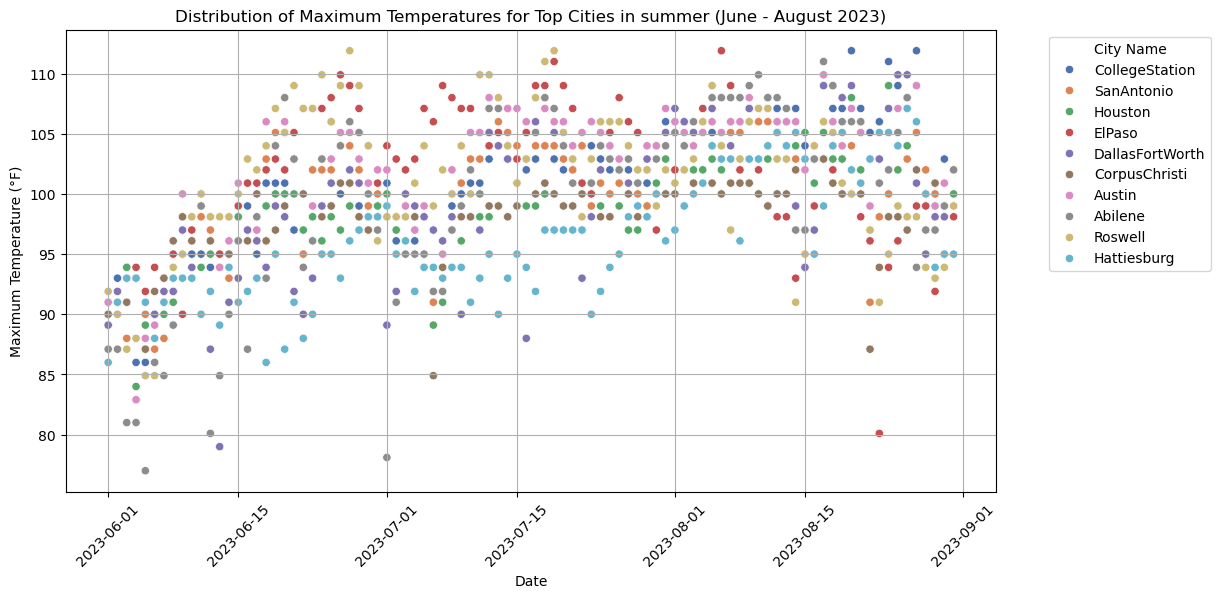

In [13]:
top_cities = avg_tmax_summer.index
scatter_data = summer_2023_data[summer_2023_data['City_Name'].isin(top_cities)]

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=scatter_data, x='Date', y='tmax', hue='City_Name', style='City_Name', palette='deep', markers='o')

# Adding titles and labels
plt.title('Distribution of Maximum Temperatures for Top Cities in summer (June - August 2023)')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (°F)')
plt.xticks(rotation=45)
plt.legend(title='City Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

## Visualize the average Temperatures(both tmax and tmin) for top cities during June, July, August 2023.

In [15]:
avg_temp_data = summer_2023_data.groupby(['City_Name', 'Date']).agg({'tmax': 'mean', 'tmin': 'mean'}).reset_index()

# Extract month for grouping
avg_temp_data['Month'] = avg_temp_data['Date'].dt.month

# Filter for top 10 cities based on avg tmax
top_cities = avg_temp_data.groupby('City_Name')['tmax'].mean().nlargest(10).index
filtered_data = avg_temp_data[avg_temp_data['City_Name'].isin(top_cities)]

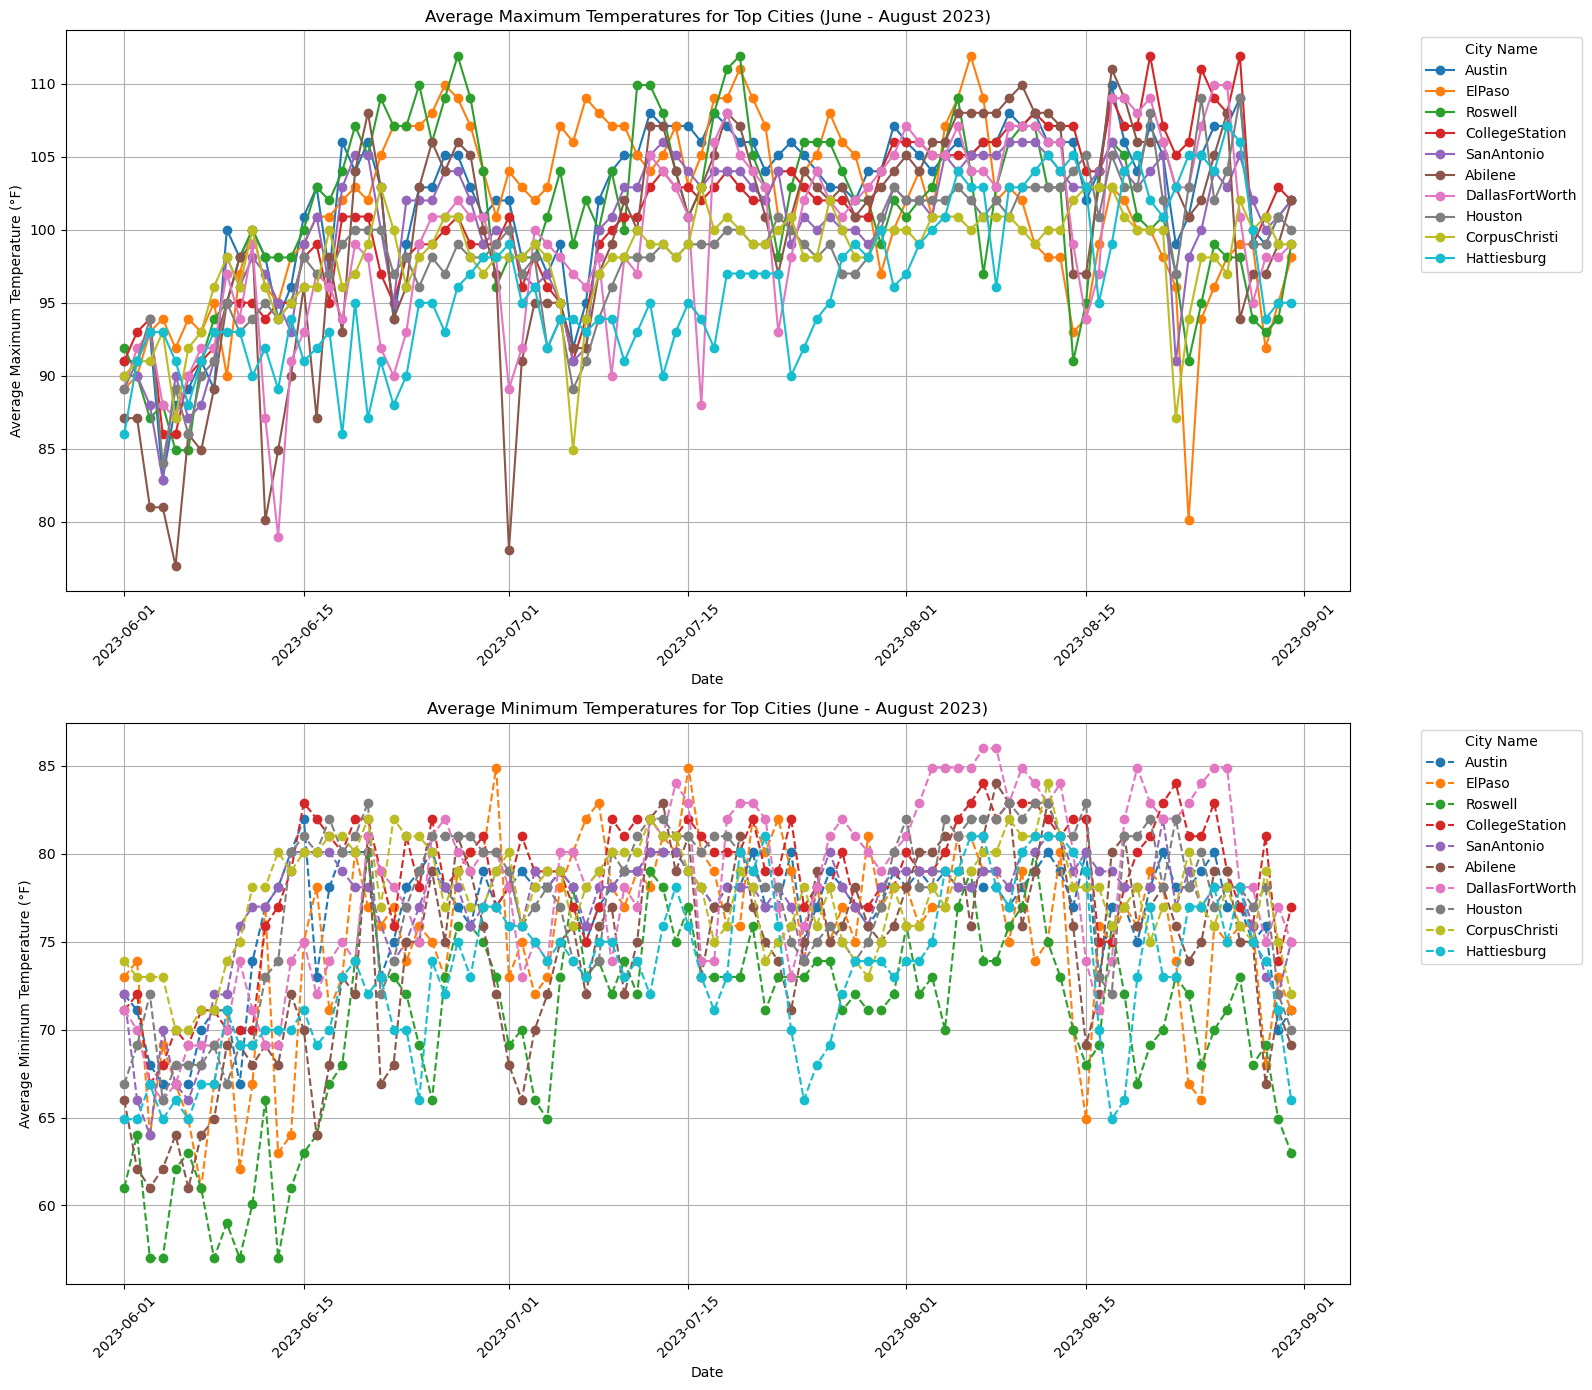

In [16]:
plt.figure(figsize=(16, 14))

# Line plot for average maximum temperatures
plt.subplot(2, 1, 1)
for city in top_cities:
    city_data = filtered_data[filtered_data['City_Name'] == city]
    plt.plot(city_data['Date'], city_data['tmax'], marker='o', label=city)

plt.title('Average Maximum Temperatures for Top Cities (June - August 2023)')
plt.xlabel('Date')
plt.ylabel('Average Maximum Temperature (°F)')
plt.xticks(rotation=45)
plt.legend(title='City Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Line plot for average minimum temperatures
plt.subplot(2, 1, 2)
for city in top_cities:
    city_data = filtered_data[filtered_data['City_Name'] == city]
    plt.plot(city_data['Date'], city_data['tmin'], marker='o', linestyle='--', label=city)

plt.title('Average Minimum Temperatures for Top Cities (June - August 2023)')
plt.xlabel('Date')
plt.ylabel('Average Minimum Temperature (°F)')
plt.xticks(rotation=45)
plt.legend(title='City Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

## Violin Plot of Distribution Of Average Maximum and Minimum Temperatures for Top cities in Winter months 2020-2023

In [18]:
# Prepare data for violin plots



winter_data = df[(df['Date'].dt.year.isin([2020,2021,2022,2023])) & (df['Date'].dt.month.isin([1,2,12]))]
avg_temp_winter = winter_data.groupby('City_Name').agg({'tmax': 'mean', 'tmin': 'mean'})
top_cities_winter = avg_temp_winter.nlargest(10, 'tmax').index.tolist()  # Top 10 by max temperature


violin_data = winter_data[winter_data['City_Name'].isin(top_cities_winter)]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8604\553149812.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_data, x='City_Name', y='tmax', palette='muted', inner='quartile')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8604\553149812.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=violin_data, x='City_Name', y='tmin', palette='pastel', inner='quartile')


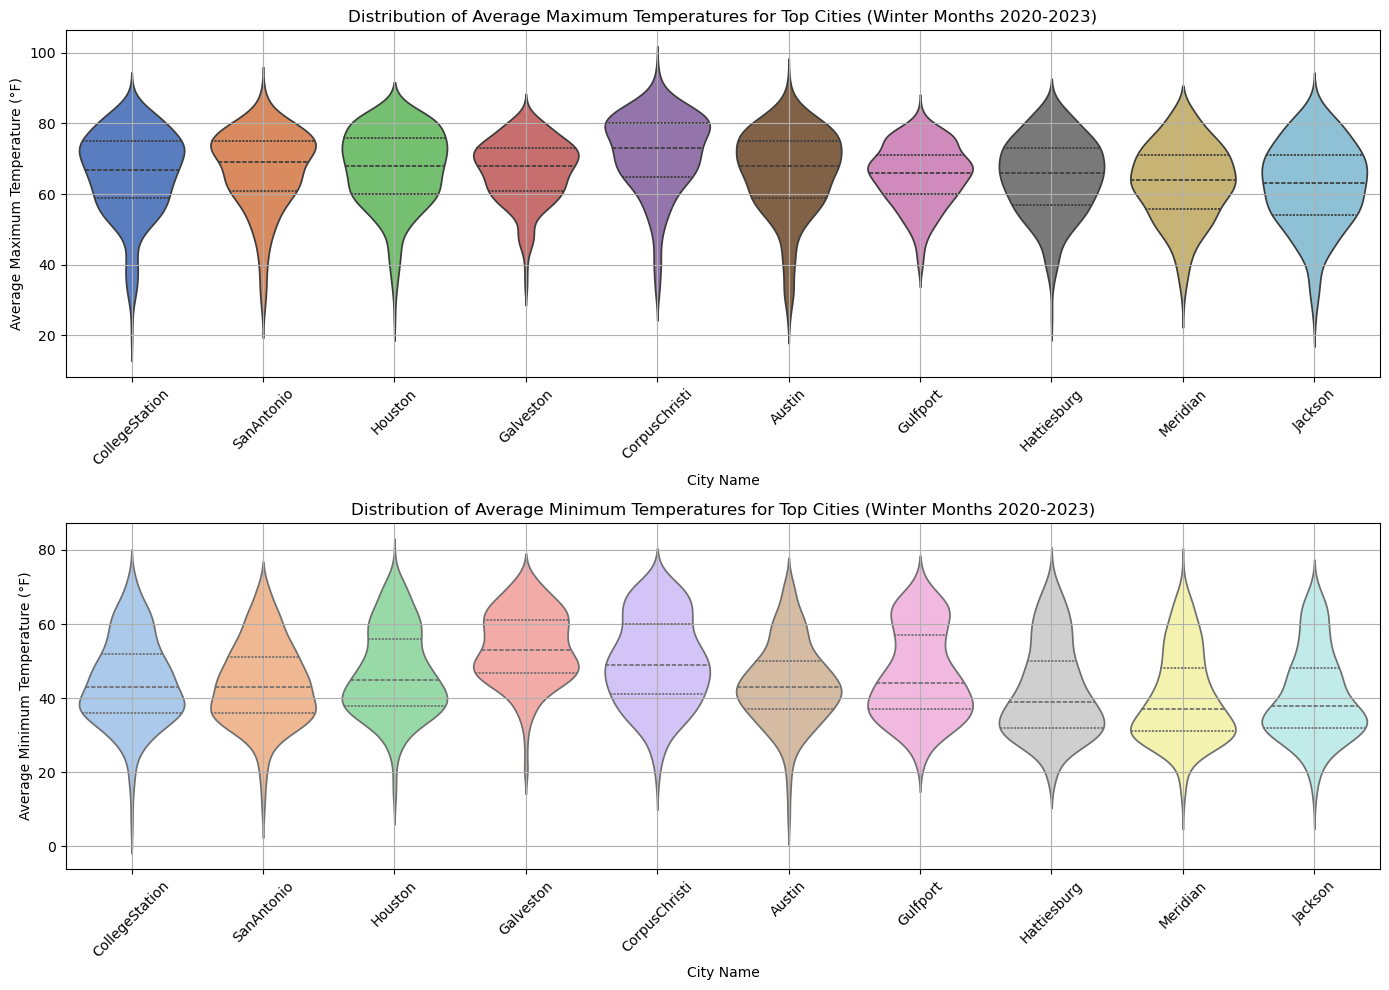

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with a facet grid
plt.figure(figsize=(14, 10))

# Violin plot for average maximum temperatures
plt.subplot(2, 1, 1)
sns.violinplot(data=violin_data, x='City_Name', y='tmax', palette='muted', inner='quartile')
plt.title('Distribution of Average Maximum Temperatures for Top Cities (Winter Months 2020-2023)')
plt.xlabel('City Name')
plt.ylabel('Average Maximum Temperature (°F)')
plt.xticks(rotation=45)
plt.grid()

# Violin plot for average minimum temperatures
plt.subplot(2, 1, 2)
sns.violinplot(data=violin_data, x='City_Name', y='tmin', palette='pastel', inner='quartile')
plt.title('Distribution of Average Minimum Temperatures for Top Cities (Winter Months 2020-2023)')
plt.xlabel('City Name')
plt.ylabel('Average Minimum Temperature (°F)')
plt.xticks(rotation=45)
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


## Visualization of Average Summer Temperature in Madison (2010-2023)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8604\2768697279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Date'] = pd.to_datetime(city_data['Date'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8604\2768697279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Year'] = city_data['Date'].dt.year


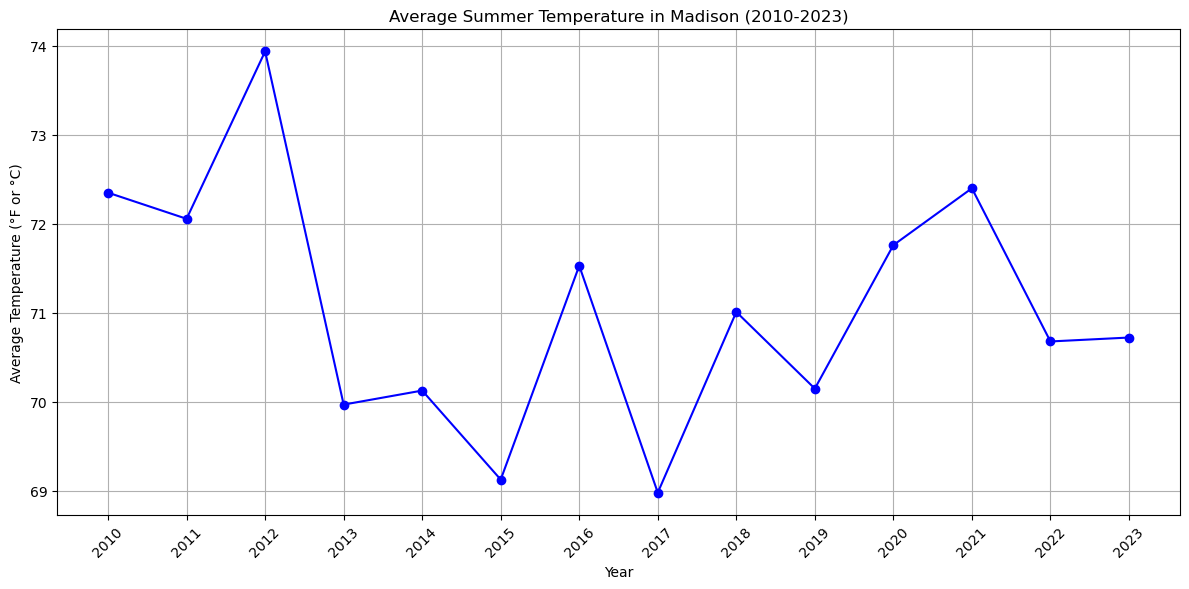

In [21]:
city_name = 'Madison'  # Replace with your city
city_data = df[df['City_Name'] == city_name]

city_data['Date'] = pd.to_datetime(city_data['Date'])
city_data['Year'] = city_data['Date'].dt.year


summer_months = city_data[city_data['Date'].dt.month.isin([6, 7, 8])]
summer_months = summer_months[(summer_months['Year'] >= 2010) & (summer_months['Year'] <= 2023)]
summer_avg_temp = summer_months.groupby('Year').agg({'tmax': 'mean', 'tmin': 'mean'})
summer_avg_temp['avg_temp'] = (summer_avg_temp['tmax'] + summer_avg_temp['tmin']) / 2



plt.figure(figsize=(12, 6))
plt.plot(summer_avg_temp.index, summer_avg_temp['avg_temp'], marker='o', color='blue')
plt.title(f'Average Summer Temperature in {city_name} (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F or °C)')
plt.grid()
plt.xticks(summer_avg_temp.index, rotation=45)
plt.tight_layout()
plt.show()


In [22]:
df

,Date,tmax,tmin,prcp,City_Name
0,1892-01-01,32.0,-5.0,0.00,Lander
1,1892-01-02,38.0,2.0,0.00,Lander
2,1892-01-03,50.0,16.0,0.00,Lander
3,1892-01-04,46.0,32.0,0.00,Lander
4,1892-01-05,21.0,10.0,0.16,Lander
...,...,...,...,...,...
6409953,2023-12-27,51.1,44.1,0.09,Detroit
6409954,2023-12-28,45.0,39.9,0.28,Detroit
6409955,2023-12-29,41.0,37.9,0.06,Detroit
6409956,2023-12-30,39.9,30.2,0.00,Detroit


## Data Transformation : Standardization for the data

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

features = df[['tmax', 'tmin', 'prcp']]

# Z-Score Standardization
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(features)
df_standard = pd.DataFrame(standard_scaled, columns=['tmax_std', 'tmin_std', 'prcp_std'])

# Label Encoding for City_Name
label_encoder = LabelEncoder()
df['City_Label'] = label_encoder.fit_transform(df['City_Name'])

# Reset indices for concatenation
df_standard.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Combine results
result_df = pd.concat([df[['Date']], df_standard, df[['City_Label']]], axis=1)

# Display the final DataFrame
print(result_df)


              Date  tmax_std  tmin_std  prcp_std  City_Label
0       1892-01-01 -1.444024 -2.386899 -0.318414          67
1       1892-01-02 -1.163249 -2.029998 -0.318414          67
2       1892-01-03 -0.601700 -1.316196 -0.318414          67
3       1892-01-04 -0.788883 -0.500423 -0.318414          67
4       1892-01-05 -1.958777 -1.622111  0.256470          67
...            ...       ...       ...       ...         ...
5966435 2023-12-27 -0.550224  0.116506  0.004958          33
5966436 2023-12-28 -0.835679 -0.097635  0.687633          33
5966437 2023-12-29 -1.022862 -0.199607 -0.102833          33
5966438 2023-12-30 -1.074337 -0.592198 -0.318414          33
5966439 2023-12-31 -1.116453 -0.398451 -0.246554          33

[5966440 rows x 5 columns]


In [25]:
result_df = result_df[result_df['Date'].between('2015-01-01', '2023-12-31')]

result_df['Year'] = result_df['Date'].dt.year
result_df['Month'] = result_df['Date'].dt.month
result_df['Day'] = result_df['Date'].dt.day

result_df.head()
result_df.info()

,Date,tmax_std,tmin_std,prcp_std,City_Label,Year,Month,Day
44614,2015-01-01,-2.660714,-3.151687,-0.318414,67,2015,1,1
44615,2015-01-02,-2.333143,-2.182956,-0.318414,67,2015,1,2
44616,2015-01-03,-2.099164,-2.233942,-0.318414,67,2015,1,3
44617,2015-01-04,-2.567122,-2.386899,-0.318414,67,2015,1,4
44618,2015-01-05,-1.163249,-2.284927,-0.318414,67,2015,1,5


In [26]:
# Features (standardized values + date features)
X = result_df[['City_Label', 'Year', 'Month', 'Day']]  # Include Date features
y_tmax = result_df['tmax_std']  # Target: standardized max temperature
y_tmin = result_df['tmin_std']  # Target: standardized min temperature
y_prcp = result_df['prcp_std']  # Target: standardized precipitation

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


X_train, X_test, y_train_tmax, y_test_tmax = train_test_split(X, y_tmax, test_size=0.2, random_state=42)
X_train, X_test, y_train_tmin, y_test_tmin = train_test_split(X, y_tmin, test_size=0.2, random_state=42)
X_train, X_test, y_train_prcp, y_test_prcp = train_test_split(X, y_prcp, test_size=0.2, random_state=42)

In [ ]:
rf_tmax = RandomForestRegressor(n_estimators=100, random_state=42)
rf_tmin = RandomForestRegressor(n_estimators=100, random_state=42)
rf_prcp = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models
rf_tmax.fit(X_train, y_train_tmax)
rf_tmin.fit(X_train, y_train_tmin)
rf_prcp.fit(X_train, y_train_prcp)

# Predictions
y_pred_tmax = rf_tmax.predict(X_test)
y_pred_tmin = rf_tmin.predict(X_test)
y_pred_prcp = rf_prcp.predict(X_test)

print("Accuracy for tmax: ",  accuracy_score(y_test_tmax, y_pred_tmax))
print("Accuracy for tmin: ",  accuracy_score(y_test_tmin, y_pred_tmin))
print("Accuracy for prcp: ",  accuracy_score(y_test_prcp, y_pred_prcp))

In [ ]:
import numpy as np

date_range_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Get the unique city labels from the training data
city_labels = result_df['City_Label'].unique()

# Create a DataFrame for 2024 with all cities having every date in 2024
future_data = []

for city_label in city_labels:
    # For each city, repeat all the dates of 2024
    city_data = pd.DataFrame({
        'Date': date_range_2024,
        'City_Label': city_label,
        'Year': date_range_2024.year,
        'Month': date_range_2024.month,
        'Day': date_range_2024.day,
    })
    future_data.append(city_data)

# Concatenate all the city-specific data into one DataFrame
future_df = pd.concat(future_data, ignore_index=True)

# Make predictions for the year 2024 using the trained models
X_future = future_df[['City_Label', 'Year', 'Month', 'Day']]
y_pred_tmax_2024 = rf_tmax.predict(X_future)
y_pred_tmin_2024 = rf_tmin.predict(X_future)
y_pred_prcp_2024 = rf_prcp.predict(X_future)

# Add predictions to the future DataFrame
future_df['predicted_tmax'] = y_pred_tmax_2024
future_df['predicted_tmin'] = y_pred_tmin_2024
future_df['predicted_prcp'] = y_pred_prcp_2024